In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

In [3]:
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add a bias term to X
X = np.c_[np.ones(X.shape[0]), X]
# Adding a column of ones for the bias
# Initialize weights randomly
np.random.seed(1)
weights = np.random.normal(0, 0.01, X.shape[1])
# Small random values

# Hyperparameters
learning_rate = 0.01
n_iterations = 20

# Batch Gradient Descent

for iteration in range(n_iterations):
    # Predictions

    predictions = X.dot(weights)
    # Calculate the loss (Mean Squared Error)
    loss = np.mean((predictions- y) ** 2)
    # Calculate the gradients
    gradients = (2 / X.shape[0]) * X.T.dot(predictions- y)
    # Update weights

    weights-= learning_rate * gradients


    # Print the loss for every iteration
    print(f"Iteration {iteration + 1}/{n_iterations},Loss: {loss:.4f}")

Iteration 1/20,Loss: 0.5239
Iteration 2/20,Loss: 0.2846
Iteration 3/20,Loss: 0.2222
Iteration 4/20,Loss: 0.1994
Iteration 5/20,Loss: 0.1859
Iteration 6/20,Loss: 0.1750
Iteration 7/20,Loss: 0.1654
Iteration 8/20,Loss: 0.1565
Iteration 9/20,Loss: 0.1483
Iteration 10/20,Loss: 0.1408
Iteration 11/20,Loss: 0.1338
Iteration 12/20,Loss: 0.1273
Iteration 13/20,Loss: 0.1212
Iteration 14/20,Loss: 0.1156
Iteration 15/20,Loss: 0.1104
Iteration 16/20,Loss: 0.1056
Iteration 17/20,Loss: 0.1011
Iteration 18/20,Loss: 0.0969
Iteration 19/20,Loss: 0.0930
Iteration 20/20,Loss: 0.0893


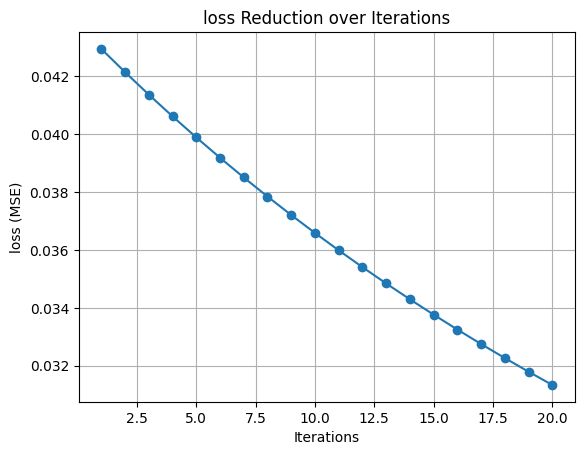

In [4]:
# Hyperparameters
learning_rate = 0.01
iterations = 20
m = len(y) # number of samples
# List to store the loss at each iteration
loss_history_gd = []
# Batch Gradient Descent
for i in range(iterations):
    #Calculate predictions
    predictions = np.dot(X, weights)
    # Compute the error
    error = predictions- y
    # Calculate the loss (MSE)
    loss = (1 / (2 * m)) * np.sum(error ** 2)
    # Store the loss in the list
    loss_history_gd.append(loss)
    # Compute the gradient
    gradient = (1 / m) * np.dot(X.T, error)
    # Update the weights
    weights = weights- learning_rate * gradient
# Plot the loss vs iterations
plt.plot(range(1, iterations + 1), loss_history_gd, marker='o')
plt.xlabel('Iterations')
plt.ylabel('loss (MSE)')
plt.title('loss Reduction over Iterations')
plt.grid(True)
plt.show()

Iteration 1, Loss: [0.00719857]
Iteration 2, Loss: [0.00578992]
Iteration 3, Loss: [0.00578991]
Iteration 4, Loss: [0.00578991]
Iteration 5, Loss: [0.00578991]
Iteration 6, Loss: [0.00578991]
Iteration 7, Loss: [0.00578991]
Iteration 8, Loss: [0.00578991]
Iteration 9, Loss: [0.00578991]
Iteration 10, Loss: [0.00578991]
Iteration 11, Loss: [0.00578991]
Iteration 12, Loss: [0.00578991]
Iteration 13, Loss: [0.00578991]
Iteration 14, Loss: [0.00578991]
Iteration 15, Loss: [0.00578991]
Iteration 16, Loss: [0.00578991]
Iteration 17, Loss: [0.00578991]
Iteration 18, Loss: [0.00578991]
Iteration 19, Loss: [0.00578991]
Iteration 20, Loss: [0.00578991]


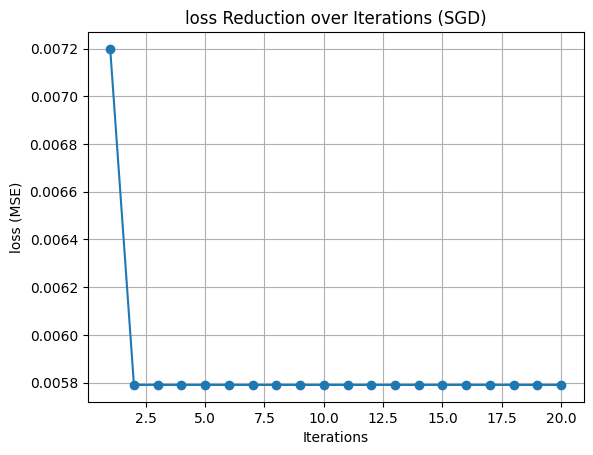

In [5]:
loss_history_sgd = []

# Stochastic Gradient Descent
for i in range(iterations):
    total_loss = 0

    for j in range(m):
        # Select one data point
        X_j = X[j, :].reshape(1,-1)
        y_j = y[j]
        # Calculate prediction
        prediction = np.dot(X_j, weights)
        # Compute the error
        error = prediction- y_j
        # Compute the loss (MSE for this data point)
        loss = (1 / 2) * (error ** 2)
        total_loss += loss
        # Compute the gradient
        gradient = np.dot(X_j.T, error)
        # Update the weights
        weights = weights- learning_rate * gradient.flatten()
    # Store the average loss for the epoch
    loss_history_sgd.append(total_loss / m)
    # Print the loss at each iteration
    average_loss = total_loss / m
    print(f"Iteration {i+1}, Loss: {average_loss}")
# Plot the loss vs iterations
plt.plot(range(1, iterations + 1), loss_history_sgd, marker='o')
plt.xlabel('Iterations')
plt.ylabel('loss (MSE)')
plt.title('loss Reduction over Iterations (SGD)')
plt.grid(True)
plt.show()

In [7]:
loss_history_newton = []

# Newton’s Method
for i in range(iterations):
    # Calculate predictions
    predictions = np.dot(X, weights)
    # Compute the error
    error = predictions- y
    # Compute the loss (MSE)
    loss = (1 / (2 * m)) * np.sum(error ** 2)
    loss_history_newton.append(loss)
    # Compute the gradient (first derivative)
    gradient = (1 / m) * np.dot(X.T, error)
    # Compute the Hessian (second derivative)
    hessian = (1 / m) * np.dot(X.T, X)
    # Update weights using Newton’s method: W = W- H^-1 * gradient
    weights = weights- np.dot(np.linalg.inv(hessian), gradient)
    # Print the loss at each iteration
    print(f"Iteration {i+1}, Loss: {loss}")

Iteration 1, Loss: 0.005160167956444826
Iteration 2, Loss: 0.004946595938438357
Iteration 3, Loss: 0.004946595938438357
Iteration 4, Loss: 0.004946595938438357
Iteration 5, Loss: 0.004946595938438357
Iteration 6, Loss: 0.004946595938438357
Iteration 7, Loss: 0.004946595938438357
Iteration 8, Loss: 0.004946595938438357
Iteration 9, Loss: 0.004946595938438357
Iteration 10, Loss: 0.004946595938438357
Iteration 11, Loss: 0.004946595938438357
Iteration 12, Loss: 0.004946595938438357
Iteration 13, Loss: 0.004946595938438357
Iteration 14, Loss: 0.004946595938438357
Iteration 15, Loss: 0.004946595938438357
Iteration 16, Loss: 0.004946595938438357
Iteration 17, Loss: 0.004946595938438357
Iteration 18, Loss: 0.004946595938438357
Iteration 19, Loss: 0.004946595938438357
Iteration 20, Loss: 0.004946595938438357


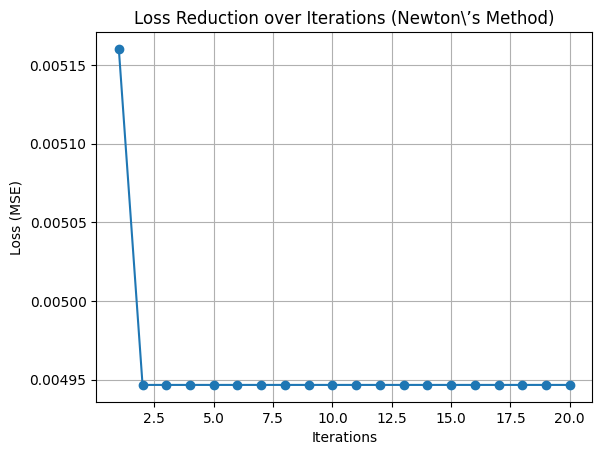

In [8]:
 # Plot the loss vs iterations
plt.plot(range(1, iterations + 1), loss_history_newton, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss Reduction over Iterations (Newton\’s Method)')
plt.grid(True)
plt.show()

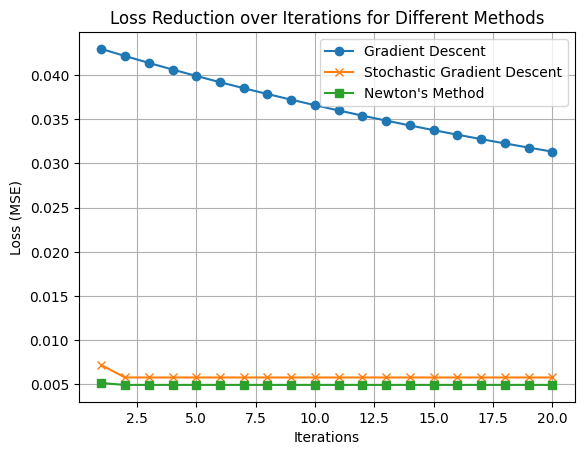

In [9]:
 # Plot the loss vs iterations for each method
plt.plot(range(1, iterations + 1), loss_history_gd,
marker='o', label='Gradient Descent')
plt.plot(range(1, iterations + 1), loss_history_sgd,
         
marker='x', label='Stochastic Gradient Descent')
plt.plot(range(1, iterations + 1), loss_history_newton,
marker='s', label='Newton\'s Method')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss Reduction over Iterations for Different Methods')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with new centers
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]  # Updated centers
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)


Converged after 527 iterations


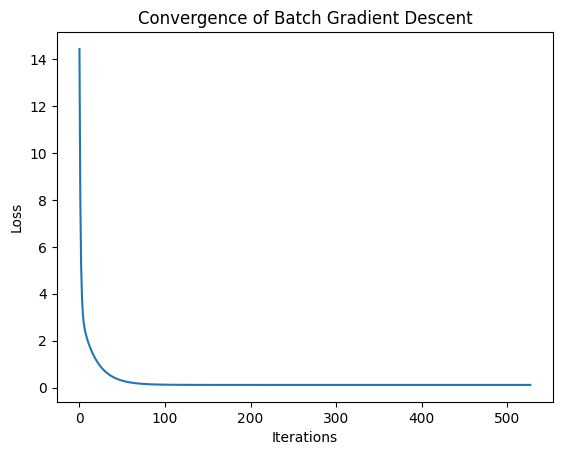

In [12]:
# Initialize weights
W = np.random.randn(2)  # Assuming 2 features
learning_rate = 0.01
max_iters = 1000
epsilon = 1e-6

# Gradient descent loop
losses = []
for i in range(max_iters):
    # Prediction: using a linear model
    y_pred = X @ W
    
    # Loss: mean squared error
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)
    
    # Compute gradients
    grad = (2 / len(X)) * X.T @ (y_pred - y)
    
    # Update weights
    W -= learning_rate * grad
    
    # Check convergence
    if np.linalg.norm(grad) < epsilon:
        print(f"Converged after {i} iterations")
        break

# Plot loss over iterations
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of Batch Gradient Descent')
plt.show()
